In [1]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [2]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
import numpy as np

X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int64)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [6]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression()
log_res.fit(X, y)

LogisticRegression()

In [7]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

In [8]:
y_proba = log_res.predict_proba(X_new)
y_proba

array([[9.99249051e-01, 7.50949397e-04],
       [9.99239224e-01, 7.60776030e-04],
       [9.99229269e-01, 7.70731151e-04],
       ...,
       [3.08499021e-03, 9.96915010e-01],
       [3.04523414e-03, 9.96954766e-01],
       [3.00598887e-03, 9.96994011e-01]])

[1.66066066]


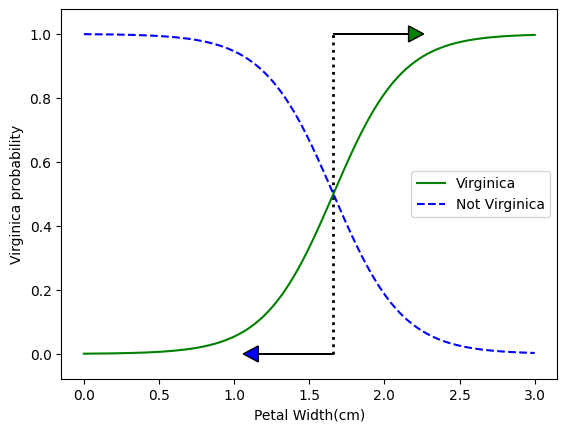

In [23]:
import matplotlib.pyplot as plt

decision_boundary = X_new[y_proba[:, 1] > 0.5][0]
print(decision_boundary)  # outputs [1.66066066], which is an array and can not be accepted by plt.arrow

plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', linewidth=2)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Virginica')
plt.arrow(decision_boundary[0], 0, -0.5, 0, head_width=0.05, head_length=0.1, fc='b')
plt.arrow(decision_boundary[0], 1, 0.5, 0, head_width=0.05, head_length=0.1, fc='g')

plt.xlabel('Petal Width(cm)')
plt.ylabel('Virginica probability')
plt.legend()

In [11]:
help(plt.arrow)

Help on function arrow in module matplotlib.pyplot:

arrow(x, y, dx, dy, **kwargs)
    Add an arrow to the Axes.
    
    This draws an arrow from ``(x, y)`` to ``(x+dx, y+dy)``.
    
    Parameters
    ----------
    x, y : float
        The x and y coordinates of the arrow base.
    
    dx, dy : float
        The length of the arrow along x and y direction.
    
    width : float, default: 0.001
        Width of full arrow tail.
    
    length_includes_head : bool, default: False
        True if head is to be counted in calculating the length.
    
    head_width : float or None, default: 3*width
        Total width of the full arrow head.
    
    head_length : float or None, default: 1.5*head_width
        Length of arrow head.
    
    shape : {'full', 'left', 'right'}, default: 'full'
        Draw the left-half, right-half, or full arrow.
    
    overhang : float, default: 0
        Fraction that the arrow is swept back (0 overhang means
        triangular shape). Can be negat

In [24]:
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.int64)
log_res = LogisticRegression()
log_res.fit(X, y)

LogisticRegression()

In [25]:
print(X[:, 0].min(), X[:, 0].max())
print(X[:, 1].min(), X[:, 1].max())

1.0 6.9
0.1 2.5


In [26]:
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1), np.linspace(0.8, 2.7, 200).reshape(-1, 1))

In [27]:
X_new = np.c_[x0.ravel(), x1.ravel()]

In [28]:
X_new

array([[2.9       , 0.8       ],
       [2.90821643, 0.8       ],
       [2.91643287, 0.8       ],
       ...,
       [6.98356713, 2.7       ],
       [6.99178357, 2.7       ],
       [7.        , 2.7       ]])

Text(0, 0.5, 'Petal Width(cm)')

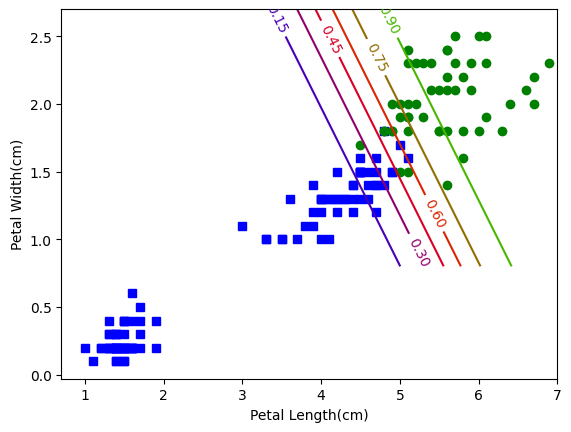

In [39]:
y_proba = log_res.predict_proba(X_new)

# print(y)
plt.plot(X[y==0, 0], X[y==0, 1], 'bs')  # scatter of X when y==0
plt.plot(X[y==1, 0], X[y==1, 1], 'go')

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)

plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')

In [41]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(solver='lbfgs')  # default is multinomial
softmax_reg.fit(X, y)

LogisticRegression()

In [42]:
softmax_reg.predict_proba([[5,2]])

array([[2.43199208e-04, 2.14948752e-01, 7.84808048e-01]])

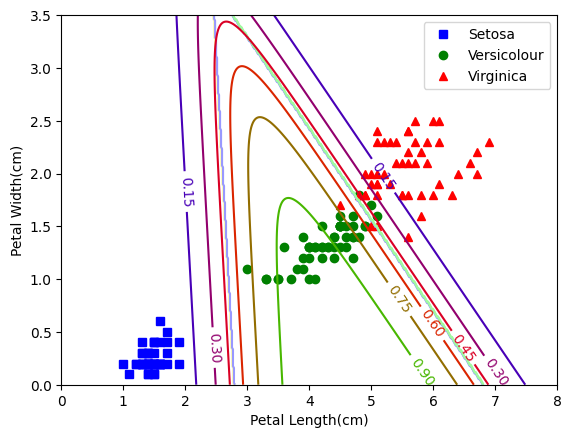

In [46]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1), np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.plot(X[y==0, 0], X[y==0, 1], 'bs', label='Setosa')  # scatter of X when y==0
plt.plot(X[y==1, 0], X[y==1, 1], 'go', label='Versicolour')
plt.plot(X[y==2, 0], X[y==2, 1], 'r^', label='Virginica')

plt.contour(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.xlabel('Petal Length(cm)')
plt.ylabel('Petal Width(cm)')
plt.legend()